<a href="https://colab.research.google.com/github/mohamedprojects/Weather-Analysis/blob/main/weatherAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Needed packages

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Downloading Data

In [38]:
from google.colab import files
upload = files.upload()

Saving weatherHistory.csv to weatherHistory (2).csv


In [39]:
import io
df = pd.read_csv(io.BytesIO(upload['weatherHistory.csv']))
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [40]:
# the number of elements per axis
df.shape

(96453, 12)

In [41]:
# Computes and displays summary statistics for dataframe
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [42]:
# returns the data type of each column
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [43]:
# know all type of unique values in 'Loud Cover' column
df['Loud Cover'].unique()

array([0.])

In [44]:
# delete the 'Loud Cover' column

del df['Loud Cover']
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9cd3a9ad0>,
      dtype=object)

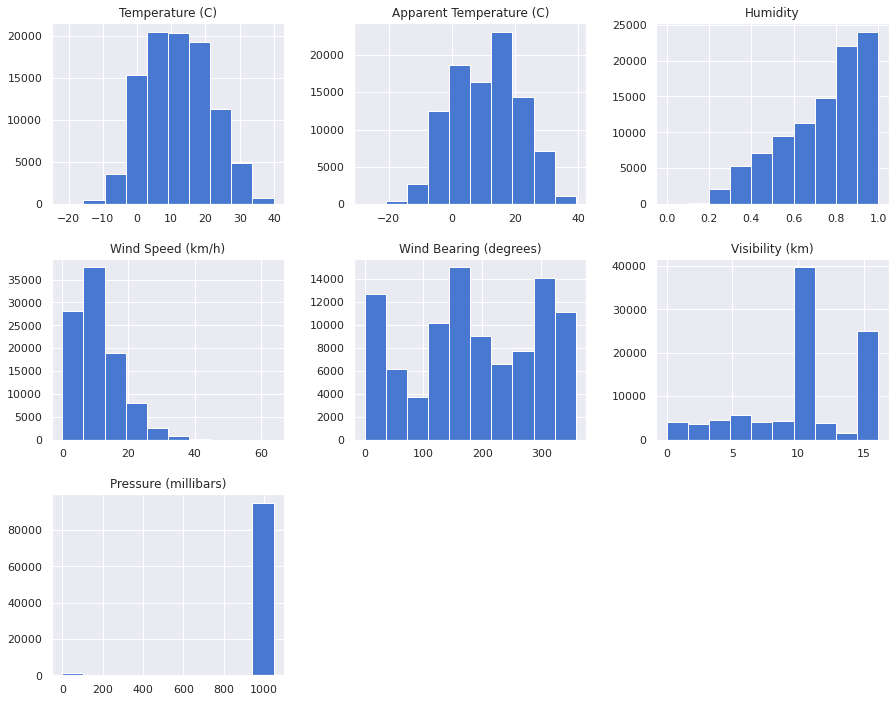

In [45]:
# draw histograms of column with type float64
df.hist(figsize=(15, 12))

In [46]:
# numbers of time where Temperature (C) equals Apparent Temperature (C)
df['correct']= np.where(df['Temperature (C)'] == df['Apparent Temperature (C)'],df['Temperature (C)'], np.nan)
df['correct'].count()

55776

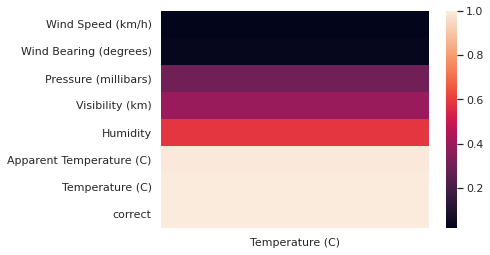

In [47]:
# show the relation between variabels
sns.heatmap(df.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'))

In [48]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [52]:
#the number of times when the Precip Type is exactly snow.
df.groupby('Precip Type').get_group('snow')



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,correct
1562,2006-12-13 02:00:00.000 +0100,Foggy,snow,-0.483333,-4.150000,1.00,11.0929,219.0,0.4830,1031.56,Foggy throughout the day.,NaN
1563,2006-12-13 03:00:00.000 +0100,Foggy,snow,-0.483333,-4.061111,0.96,10.7387,200.0,0.3220,1031.47,Foggy throughout the day.,NaN
1564,2006-12-13 04:00:00.000 +0100,Foggy,snow,-0.922222,-3.477778,1.00,7.0679,206.0,0.1610,1031.23,Foggy throughout the day.,NaN
1565,2006-12-13 05:00:00.000 +0100,Foggy,snow,-1.038889,-4.400000,1.00,9.4990,199.0,0.1610,1031.41,Foggy throughout the day.,NaN
1566,2006-12-13 06:00:00.000 +0100,Foggy,snow,-1.088889,-4.438889,1.00,9.4346,219.0,0.3220,1031.98,Foggy throughout the day.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
93265,2016-03-28 05:00:00.000 +0200,Foggy,snow,-0.783333,-2.950000,0.99,6.1019,91.0,3.1073,1016.30,Foggy in the morning.,NaN
93266,2016-03-28 06:00:00.000 +0200,Foggy,snow,-1.111111,-1.111111,0.93,0.0000,0.0,0.1610,1016.41,Foggy in the morning.,-1.111111
93267,2016-03-28 07:00:00.000 +0200,Foggy,snow,-1.044444,-1.044444,1.00,0.0000,0.0,0.7728,1016.60,Foggy in the morning.,-1.044444
93311,2016-03-03 03:00:00.000 +0100,Partly Cloudy,snow,-0.511111,-0.511111,1.00,3.5098,74.0,14.6832,1004.57,Mostly cloudy throughout the day.,-0.511111


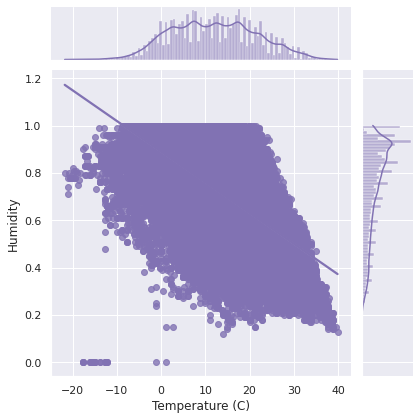

In [51]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Temperature (C)", y="Humidity", data=df,kind="reg",color="m")

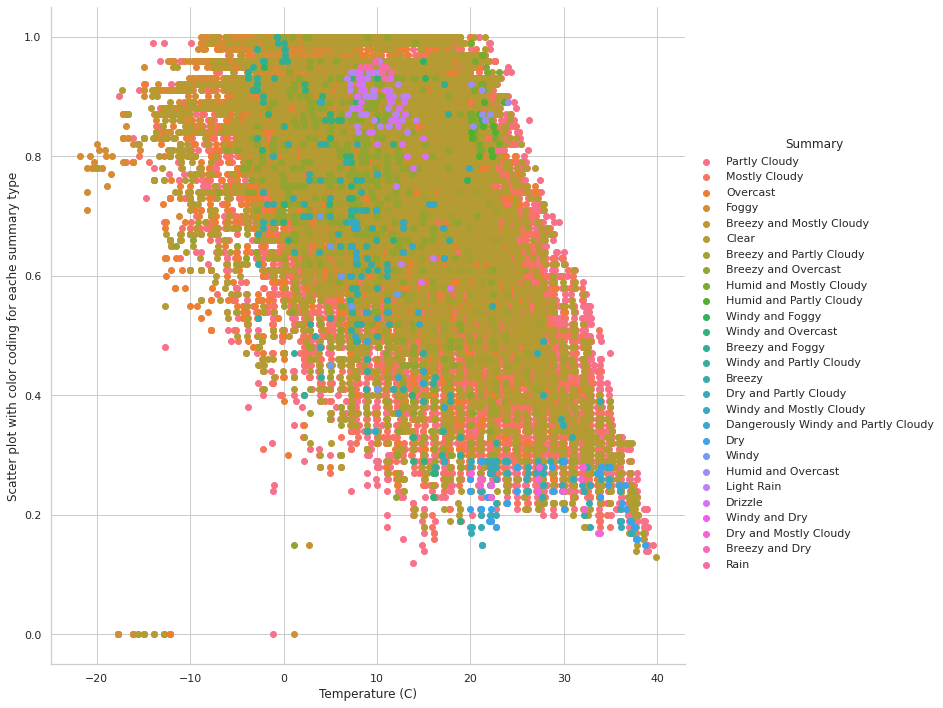

In [50]:
# Scatter plot with color coding for eache summary type
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.FacetGrid(df, hue="Summary", height=10).map(plt.scatter, "Temperature (C)", "Humidity").add_legend()
ax.set(ylabel="Scatter plot with color coding for eache summary type")

Text(0.5, 1.0, 'Analysis of Weather Conditions with Temperature(C)')

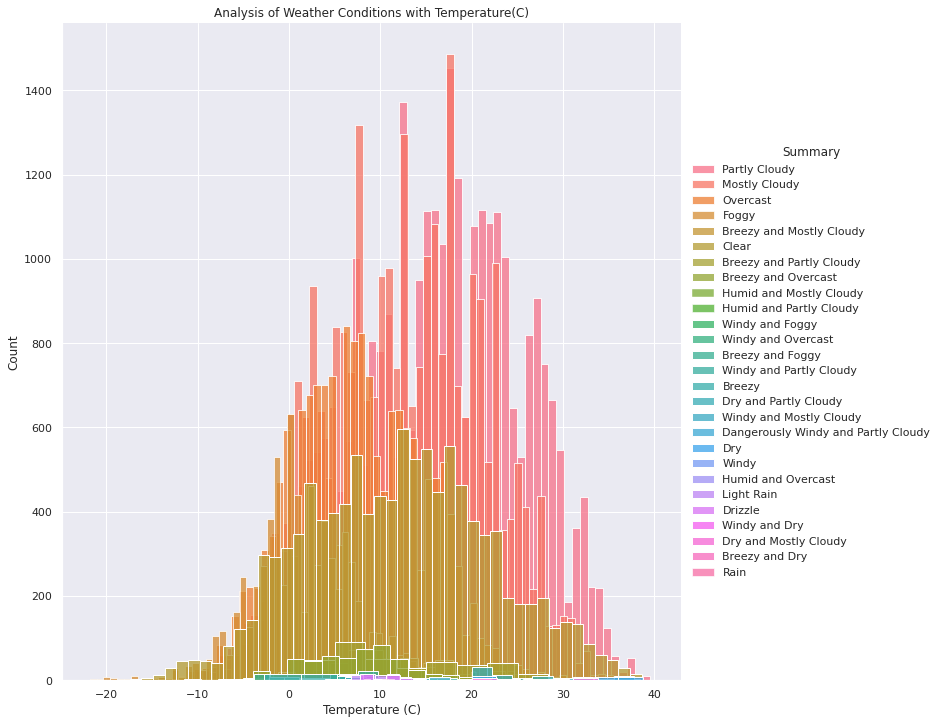

In [49]:
# Analysis of Weather Conditions with Temperature(C)
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Summary", height=10).map(sns.histplot, "Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Temperature(C)")